# Freedom in the World 2013 - 2021 EDA

The Freedom in the World report analyzes the political rights (PR) and civil
liberties (CL) of countries around the world. Every year Freedom House releases
a new version of the report.

Political Rights (PR) is an aggregate score of:
- Electoral process
- Political plurism and participation
- Function of government

Civil Liberties (CL) is an aggregate score of:
- Freedom of expression and belief
- Associational and organizational rights
- Rule of law
- Personal autonomy and individual rights

Using a weighted total, each country is given a status score of:
- Free (F)
- Partially Free (PF)
- Not Free (NF)

Country regions are grouped as:
- Americas
- Asia
- Eurasia
- Europe
- Middle East/ North Africa (MENA)
- Sub-Saharan Africa (SSA)

The sum of the PR and CL score creates a total score for the Freedom in the
World report.

Dataset is available at https://freedomhouse.org/report/freedom-world

Methodology availble at
https://freedomhouse.org/reports/freedom-world/freedom-world-research-methodology

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read country data from excel file
excel_filename = 'All_data_FIW_2013-2021.xlsx'
countries = pd.read_excel(
        excel_filename,
        sheet_name=1,
        header=1,
        usecols='A:G, W, AQ, AR')
# Remove territories from dataset
countries = countries[countries['C/T'] == 'c']
countries = countries.drop('C/T', axis=1)
countries = countries.rename(
        columns={'Country/Territory': 'Country', 'Edition': 'Year'})
countries.head()

,Country,Region,Year,Status,PR rating,CL rating,PR,CL,Total
1,Afghanistan,Asia,2021,NF,5,6,13,14,27
2,Albania,Europe,2021,PF,3,3,27,39,66
3,Algeria,MENA,2021,NF,6,5,10,22,32
4,Andorra,Europe,2021,F,1,1,38,55,93
5,Angola,SSA,2021,NF,6,5,10,21,31


In [3]:
countries.dtypes

Country      object
Region       object
Year          int64
Status       object
PR rating     int64
CL rating     int64
PR            int64
CL            int64
Total         int64
dtype: object

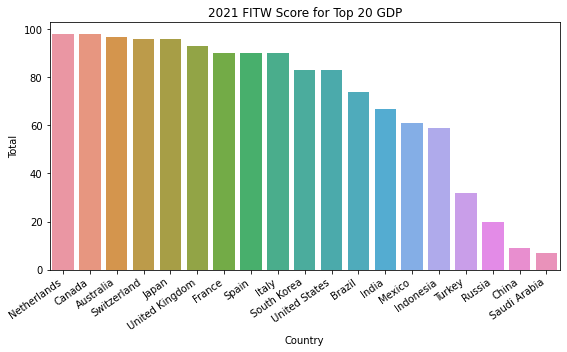

In [4]:
# Bar graph of all counties in 2021
# TODO change to line graph over time
highest_gdp = [
        'United States', 'China', 'Japan', 'United Kingdom', 'India',
        'France', 'Italy', 'Canada', 'South Korea', 'Russia', 'Brazil',
        'Australia', 'Spain', 'Indonesia', 'Mexico', 'Netherlands',
        'Switzerland', 'Saudi Arabia', 'Turkey']
scores = countries[countries['Year'] == 2021]
scores = scores[scores['Country'].isin(highest_gdp)]
scores = scores.sort_values(
        by='Total',
        axis=0,
        ascending=False)
plt.figure(figsize=(8, 5))
g = sns.barplot(
        x='Country',
        y='Total',
        data=scores)
g.set_title('2021 FITW Score for Top 20 GDP')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.savefig('images/country_scores_by_gdp.png')

<Figure size 432x288 with 0 Axes>

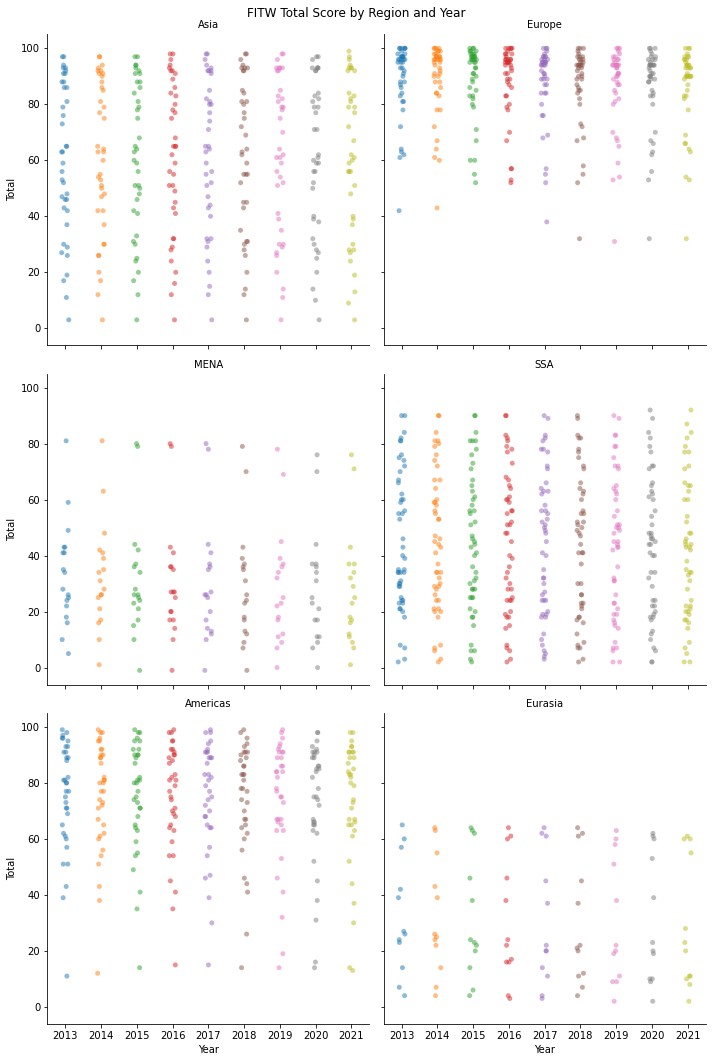

In [5]:
# voilin plot showing the change in distribution by year
plt.figure()
np.random.seed(1984)
g = sns.catplot(
        x='Year',
        y='Total',
        data=countries,
        kind='strip',
        col='Region',
        col_wrap=2,
        alpha=0.5)
g.set_titles('{col_name}')
g.fig.suptitle('FITW Total Score by Region and Year')
plt.tight_layout()
plt.savefig('images/scores_by_year_and_region_stripplot.png')

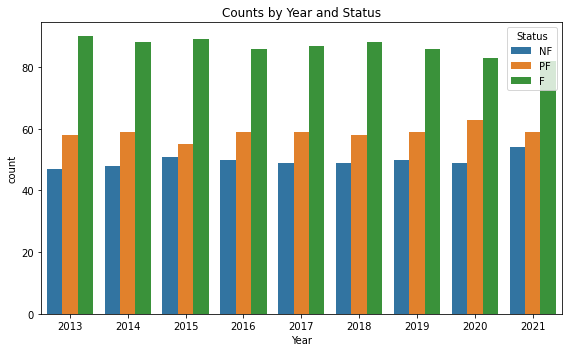

In [6]:
# barplot time vs status
plt.figure(figsize=(8, 5))
g = sns.countplot(x='Year', hue='Status', data=countries)
g.set_title('Counts by Year and Status')
plt.savefig('images/counts_by_year_and_status.png')
plt.tight_layout()

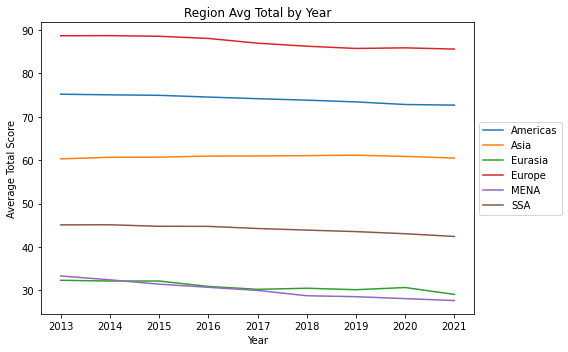

In [7]:
regions = countries.groupby(['Region', 'Year'], as_index=False).mean()
plt.figure(figsize=(8, 5))
g = sns.lineplot(x='Year', y='Total', hue='Region', data=regions)
g.set_title('Region Avg Total by Year')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Average Total Score')
plt.tight_layout()
plt.savefig('images/regions_avg_total_score_by_year.png')

<Figure size 432x288 with 0 Axes>

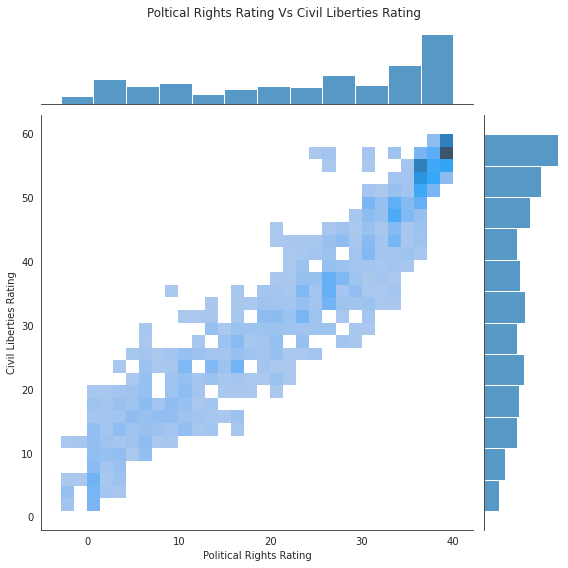

In [8]:
sns.set_style('white')
plt.figure()
g = sns.jointplot(
        x='PR',
        y='CL',
        data=countries,
        bins=30,
        kind='hist',
        height=8)
g.ax_joint.set_xlabel('Political Rights Rating')
g.ax_joint.set_ylabel('Civil Liberties Rating')
g.fig.suptitle('Poltical Rights Rating Vs Civil Liberties Rating')
plt.tight_layout()
plt.savefig('images/cl_vs_pr_jointplot.png')


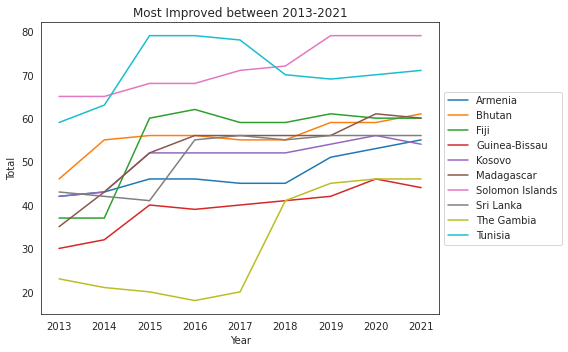

In [9]:
# most improved
changes = countries.pivot(index='Country', columns='Year', values='Total')
changes.columns = changes.columns.map(str)
changes['2013-2021 Change'] = changes['2021'] - changes['2013']
changes = changes.sort_values(by='2013-2021 Change', ascending=False)
improved_countries = changes.iloc[:10].index
improved = countries[countries['Country'].isin(improved_countries)]
plt.figure(figsize=(8, 5))
g = sns.lineplot(x='Year', y='Total', data=improved, hue='Country')
g.set_title('Most Improved between 2013-2021')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('images/most_improved.png')

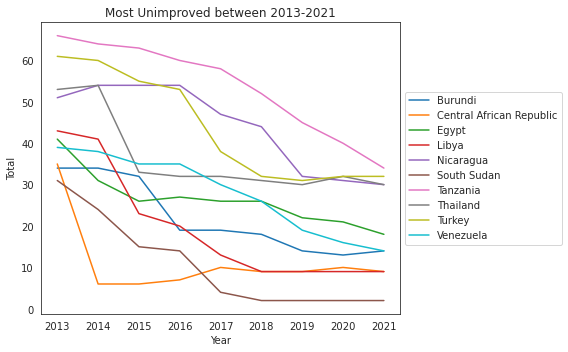

In [10]:
# most unimproved
unimproved_countrys = changes.iloc[-10:].index
unimproved = countries[countries['Country'].isin(unimproved_countrys)]
plt.figure(figsize=(8, 5))
g = sns.lineplot(x='Year', y='Total', data=unimproved, hue='Country')
g.set_title('Most Unimproved between 2013-2021')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('images/most_unimproved.png')


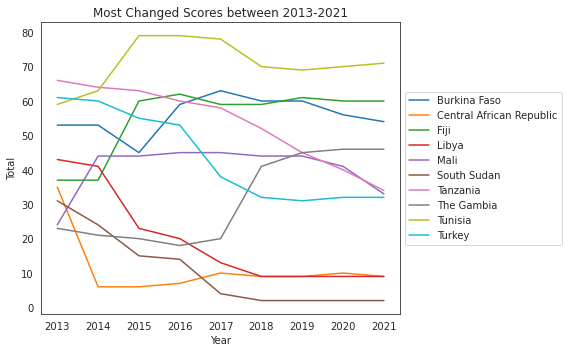

In [11]:
# most changed overall
# make a column for every year and cumsum the differences across columns
def difference(row):
    '''
    Args:
        l (pandas.Series): list of numbers
    Returns:
        total (int): cummulative differences between numbers in list
    '''
    total = 0
    for i in range(len(row)-1):
        total += abs(row[i] - row[i+1])
    return total


changes = changes.drop(columns='2013-2021 Change')
changes['Overall Change'] = changes.apply(difference, axis=1)
changes = changes.sort_values(by='Overall Change', ascending=False)
most_changed_countries = changes.iloc[:10].index
most_changed = countries[countries['Country'].isin(most_changed_countries)]
plt.figure(figsize=(8, 5))
g = sns.lineplot(x='Year', y='Total', data=most_changed, hue='Country')
g.set_title('Most Changed Scores between 2013-2021')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('images/most_changed_between_2013-2021.png')
